In [1]:
import keras
from keras.layers import *
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import to_categorical
import pandas as pd
import mnist
from PIL import Image

In [2]:
x_train = mnist.train_images()
y_train = mnist.train_labels()

In [3]:
input_shape = (28, 28, 1)
x_train = x_train / 255
y_train_cat = to_categorical(y_train, 10)

Для решения задачи применим лучшую модель из hw_2. <br>
Заменим количество нейронов внутреннего слоя с 50 на 70

In [4]:
best_model = keras.Sequential([
      keras.Input(shape=input_shape),
      Flatten(),
      Dense(70, activation = 'relu'),
      Dense(10, activation = 'softmax')
      ] )

In [5]:
best_model.compile(optimizer='Adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [6]:
history = best_model.fit(x_train, y_train_cat, batch_size=32, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3017 - accuracy: 0.9146
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1415 - accuracy: 0.9587
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1012 - accuracy: 0.9700
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0781 - accuracy: 0.9769
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0637 - accuracy: 0.9809
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0528 - accuracy: 0.9839
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0443 - accuracy: 0.9869
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0376 - accuracy: 0.9881
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0324 - accuracy: 0.9903
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.028

Получили модель с точностью 99,13%

С помощью дополнительных модулей загрузим свои картинки из папки img в двумерный массив np
<br>
https://fixmypc.ru/post/izmenenie-razmera-kartinki-v-python-s-pillow-pil/#izmenenie-razmera-izobrazheniia-s-resize

In [7]:
img_array = np.array([])
for i in range(1, 6):
    # Загружаем картинку, переводим изображение в двумерную матрицу и меняем ее размер
    img = np.asarray(Image.open(f'img\img_{i}.png').convert('L').resize((28, 28)), )
    # нормализуем изображение
    img = img / 255
    # Добавляем картинку в массив
    img_array = np.append(img_array, img) 
else:
    # Задаем размер матрицы (для 5 изображений будет 5, 28, 28)
    img_array = img_array.reshape(i, 28, 28)
    # Делаем прозрачный фон (белый цвет->прозрачный)
    img_array[img_array > 0.9 ] = 0
    

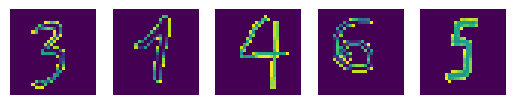

In [8]:
# Выведем собственные рукописные цыфры
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(img_array[i])
    # Убираем подписи к осям рисунков
    plt.axis('off')
plt.show()

In [9]:
# Предсказываем 5-ть рукописных цыфр
predictions = best_model.predict(img_array)

# Выведем результат предсказания
print(f'Predictions: {np.argmax(predictions, axis=1)}')

1/1 [==============================] - 0s 126ms/step
Predictions: [3 1 4 6 5]


Вывод: Модель успешно предсказала 5 цифр